# Cox model execution - 1st article
In this notebook, we test the Cox model for the data from the following article : https://doi.org/10.1158/1078-0432.CCR-20-1163.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from survivalAnalysis.CoxModel import CoxModel

In [2]:
coxmodel = CoxModel()

## 1. Reading and preprocessing
We read the ```data/Supplemental-table1.xlsx``` file, and we drop the non-naive patients from the dataframe.

In [9]:
df = pd.read_excel('data/table-s1-sigmut.xlsx')
df = df.loc[df["Cohort"] == "Naive"]
df

,Anonymous ID,EGA ID,Tumour type,Sex,Line of therapy,Immunotherapy regimen,Cohort,Reason for discontinuation,Best response,Age at advanced disease diagnosis,...,SBS6,SBS7a,SBS7b,SBS7c,SBS13,SBS26,SBS44,Tumour type.1,Exome mut per mb.1,Genome mut per mb.1
0,23701,EGAD00001002576,BRCA,F,7,"GEMCITABINE, VINORELBINE, PEMBROLIZUMAB (ARIZONA)",Naive,Progression/death,Progressive disease,30,...,0.000000,0.000000,0.000000,0.058643,0.219746,0.000000,0.000000,BRCA,5.617878,7.0476
1,25980,EGAD00001002997,BRCA,F,5,Pembrolizumab,Naive,Progression,Partial response,59,...,0.000000,0.000000,0.000000,0.068387,0.080349,0.000000,0.000000,BRCA,6.853812,9.3941
2,30221,EGAD00001003607,BRCA,F,1,Pembrolizumab,Naive,Progression,Progressive disease,53,...,0.055076,0.000000,0.000000,0.046292,0.109279,0.000000,0.000000,BRCA,6.853812,7.3266
3,31031,EGAD00001003720,BRCA,F,4,"TRASTUZUMAB, DURVALUMAB",Naive,Progression,Progressive disease,49,...,0.000000,0.000000,0.000000,0.049116,0.102175,0.000000,0.000000,BRCA,7.134706,8.3420
4,33532,EGAD00001004623,BRCA,F,6,"NIVOLUMAB (P1T986205),BMS-986205 (P1T986205)/I...",Naive,Progression,Stable disease,68,...,0.081547,0.000000,0.000000,0.054670,0.157417,0.068070,0.000000,BRCA,5.084180,5.9052
5,37970,EGAD00001004706,CHOL,M,2,"Tremelimumab, Durvalumab",Naive,Progression,Progressive disease,59,...,0.089383,0.000000,0.000000,0.048926,0.000000,0.000000,0.000000,CHOL,1.825810,2.5119
6,25419,EGAD00001002611,COLO,M,2,Atezolizumab,Naive,Progression,Progressive disease,48,...,0.239516,0.000000,0.000000,0.059283,0.034684,0.076539,0.000000,COLO,2.724671,4.3225
7,25589,EGAD00001002628,COLO,F,4,Nivolumab,Naive,Progression,Physician assessed PR,55,...,0.000000,0.000000,0.000000,0.000000,0.369304,0.000000,0.000000,COLO,16.348026,16.0194
8,25604,EGAD00001002632,GCT,M,5,Atezolizumab,Naive,Progression,Stable disease,26,...,0.052485,0.000000,0.087626,0.062000,0.036009,0.000000,0.000000,GCT,3.202191,5.2737
9,32395,EGAD00001003734,HNSC,M,1,Pembrolizumab,Naive,Death,Not evaluable,71,...,0.000000,0.509550,0.490450,0.000000,0.000000,0.000000,0.000000,HNSC,62.948328,96.0990


## 2. Compare high risk patients and low risk patients

### a. Find risk classes
With the ```CoxModel``` class implementing a Cox Regression, we can determine the risk class for each sample : high (class 1) or low (class 0). Because we have few data, we use a **leave one out cross validation**, which consists in fitting the model with all the dataset except 1 sample, then we predict the risk class for the test sample.

In [11]:
# Preprocessing for the label data
X = df.drop(["Anonymous ID","EGA ID","Tumour type","Sex","Line of therapy","Immunotherapy regimen","Cohort","Reason for discontinuation","Best response","Clinical benefit","Lymph related"],axis=1)
#X = df.loc[:,["Age at advanced disease diagnosis","CD8+ T cell score","Exome mut per mb","Genome mut per mb","CD274 expression","M1M2 expression"]].to_numpy()
y_ttp = np.array(list((df[['Progression_1','Time to progression (days)']].itertuples(index=False, name=None))),dtype=[('Progression_1', '?'), ('Time to progression (days)', '<f8')])
y_os = np.array(list((df[['Alive_0','Overall survival (days)']].itertuples(index=False, name=None))),dtype=[('Alive_0', '?'), ('Overall survival (days)', '<f8')])
print(X.columns)

# Finding the risk classes - TTP
risk_classes_ttp, risk_scores_ttp = coxmodel.leave_one_out_cross_validation(X,y_ttp)
print("TTP :")
print(risk_classes_ttp)
print(risk_scores_ttp)

# Finding the risk classes - OS
print("\n OS :")
risk_classes_os, risk_scores_os = coxmodel.leave_one_out_cross_validation(X,y_os)
print(risk_classes_os)
print(risk_scores_os)

Index(['Age at advanced disease diagnosis', 'Overall survival (days)',
       'Alive_0', 'Time to progression (days)', 'Progression_1',
       'CD8+ T cell score', 'Exome mut per mb', 'Genome mut per mb',
       'CD274 expression', 'M1M2 expression', 'SBS2', 'SBS4', 'SBS18', 'SBS5',
       'SBS6', 'SBS7a', 'SBS7b', 'SBS7c', 'SBS13', 'SBS26', 'SBS44',
       'Tumour type.1', 'Exome mut per mb.1', 'Genome mut per mb.1'],
      dtype='object')


KeyError: "None of [Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,\n       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34],\n      dtype='int64')] are in the [columns]"

### b. Compute concordance index
In this context, the concordance index measures the proportion of patients comparable pairs in which the risk score and the surviving time are concordant.

In [5]:
# TTP : 
status_ttp, time_ttp = df['Progression_1'].to_numpy().astype(bool), df['Time to progression (days)'].to_numpy()
c_index_ttp = coxmodel.get_c_index(status_ttp, time_ttp, risk_scores_ttp)
print(f"C index (TTP) : {c_index_ttp}")

# OS :
status_os, time_os = df['Alive_0'].to_numpy().astype(bool), df['Overall survival (days)'].to_numpy()
c_index_os = coxmodel.get_c_index(status_os, time_os, risk_scores_os)
print(f"C index (OS) : {c_index_os}")

C index (TTP) : 0.57
C index (OS) : 0.56


### c. Compute p value of the log rank test
The log rank test compares 2 survival curves. If the p value is low (under 5%), the 2 curves are different. Otherwise, the 2 curves are pretty similar. We make this test for the low risk (class 0) and high risk curves (class 1).

In [6]:
# TTP :
p_value_ttp = coxmodel.log_rank_test(status_ttp.astype(int), time_ttp, risk_classes_ttp)
print(f"p value (TTP) : {p_value_ttp}")

# OS :
p_value_os = coxmodel.log_rank_test(status_os.astype(int), time_os, risk_classes_os)
print(f"p value (OS) : {p_value_os}")

p value (TTP) : 0.04
p value (OS) : 0.19


### d. Vizualize survival curves for each class

In [7]:
# TTP :
print("TTP : ")
# Low risk class
status_low_ttp, time_low_ttp = status_ttp[np.where(risk_classes_ttp==0)], time_ttp[np.where(risk_classes_ttp==0)]
time_axis_low_ttp, prob_axis_low_ttp = coxmodel.kaplan_meier_estimation(status_low_ttp, time_low_ttp)
# High risk class
status_high_ttp, time_high_ttp = status_ttp[np.where(risk_classes_ttp==1)], time_ttp[np.where(risk_classes_ttp==1)]
time_axis_high_ttp, prob_axis_high_ttp = coxmodel.kaplan_meier_estimation(status_high_ttp, time_high_ttp)
print(f"n_samples low risk : {status_low_ttp.shape[0]}")
print(f"n_samples high risk : {status_high_ttp.shape[0]}")

# OS :
print("\n OS : ")
# Low risk class
status_low_os, time_low_os = status_os[np.where(risk_classes_os==0)], time_os[np.where(risk_classes_os==0)]
time_axis_low_os, prob_axis_low_os = coxmodel.kaplan_meier_estimation(status_low_os, time_low_os)
# High risk class
status_high_os, time_high_os = status_os[np.where(risk_classes_os==1)], time_os[np.where(risk_classes_os==1)]
time_axis_high_os, prob_axis_high_os = coxmodel.kaplan_meier_estimation(status_high_os, time_high_os)
print(f"n_samples low risk : {status_low_os.shape[0]}")
print(f"n_samples high risk : {status_high_os.shape[0]}")

TTP : 
n_samples low risk : 38
n_samples high risk : 44

 OS : 
n_samples low risk : 40
n_samples high risk : 42


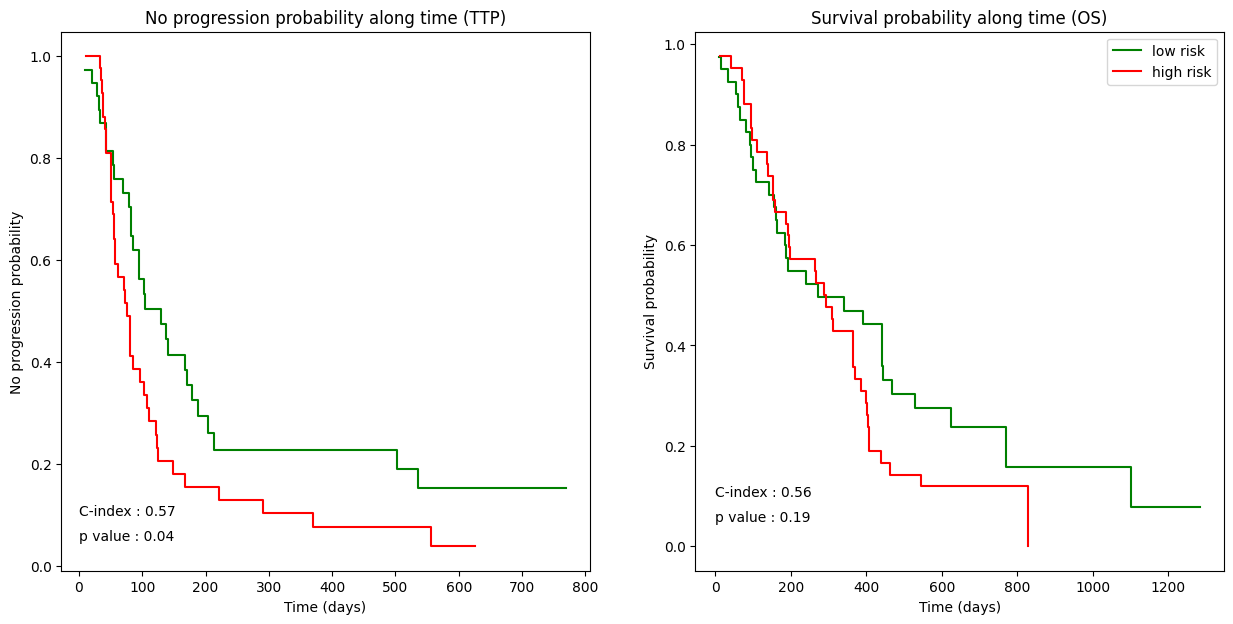

In [8]:
fig, ax = plt.subplots(1,2,figsize=(15,7))
ax[0].step(time_axis_low_ttp, prob_axis_low_ttp, where='post',color='green',label='low risk')
ax[0].step(time_axis_high_ttp, prob_axis_high_ttp, where='post',color='red',label='high risk')
ax[0].set_xlabel('Time (days)')
ax[0].set_ylabel('No progression probability')
ax[0].set_title('No progression probability along time (TTP)')
ax[0].text(0,0.1,f'C-index : {c_index_ttp}')
ax[0].text(0,0.05,f'p value : {p_value_ttp}')

ax[1].step(time_axis_low_os, prob_axis_low_os, where='post',color='green',label='low risk')
ax[1].step(time_axis_high_os, prob_axis_high_os, where='post',color='red',label='high risk')
ax[1].set_xlabel('Time (days)')
ax[1].set_ylabel('Survival probability')
ax[1].set_title('Survival probability along time (OS)')
ax[1].text(0,0.1,f'C-index : {c_index_os}')
ax[1].text(0,0.05,f'p value : {p_value_os}')

plt.legend()
plt.savefig('km-survival-curve.png')